# Isobraic binary phase diagrams

These are a few examples of how to use Thermo-Calc TDB files to calculate isobaric binary phase diagrams. As long as the TDB file is present, each cell in these examples is self contained and can completely reproduce the figure shown.

Units are Kelvin

## Importing modules

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import Database, binplot
from pycalphad import Database, equilibrium, variables as v
import numpy as np
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker


### Defining file paths for program and database

In [87]:
# Set the file path
dbf_diretory = r'C:\PythonCode\Environments\Calphad\pycalphad\pycalphad codes\1 - databases\Copper\\'
# dbf_diretory = r'C:\PythonCode\Environments\Calphad\pycalphad\pycalphad codes\1 - databases\\'

### Load database

In [96]:
# dbf = Database(dbf_diretory + 'Hsiao_(2016)_Cu-Zr.tdb')
# dbf = Database(dbf_diretory + 'Qiu_(2020)_calpha_101734_CuCrNi.tdb')
dbf = Database(dbf_diretory + 'Cu-Cr-Zr-Ni_Test3.tdb')
# dbf = Database(dbf_diretory + 'steel_database_fix.tdb') #Steel database Might be good for C18000


### Determine phases

In [97]:
phases = list(dbf.phases.keys())
# phases = ['LIQUID','FCC_A1','HCP_A3','BCC_A2','NI5ZR','NI7ZR2','NI3ZR','NI21ZR8','NI10ZR7',
           # 'NI11ZR9','NIZR','ZR2NI'] #Ni-Zr

# phases = ['LIQUID','FCC_A1','BCC_A2'] #Cu-Cr

# phases = ['LIQUID','FCC_A1','HCP_A3','BCC_A2','CU5ZR','CU9ZR2','CU51ZR14','CU8ZR3','CU10ZR7','CUZR','CUZR2',] #Cu-Zr

# phases = ['LIQUID', 'FCC_A1', 'HCP_A3', 'BCC_A2', 'AL3SC', 'AL2SC', 'ALSC']
# phases = ['LIQUID', 'FCC_A1', 'AL3SC']
# phases = ['LIQUID', 'FCC_A1', 'AL3ZR']
phases

['CBCC_A12',
 'LIQUID',
 'FCC_A1',
 'BCC_A2',
 'HCP_A3',
 'NI7ZR2',
 'NI3ZR',
 'NI21ZR8',
 'NI10ZR7',
 'NI11ZR9',
 'NIZR',
 'ZR2NI',
 'NI5ZR',
 'CU5ZR_C15B',
 'CU9ZR2',
 'CU51ZR14',
 'CU8ZR3',
 'CU10ZR7',
 'CUZR',
 'CUZR2',
 'C14_LAVES',
 'C15_LAVES',
 'C36_LAVES',
 'DIAMOND_A4',
 'CU33SI7_A13',
 'CU33SI7_HT',
 'CU15SI4_D86',
 'CU3SI_LT',
 'CU3SI_MT',
 'CU3SI_HT']

## Set conditions

In [102]:
composition_range = {v.X('SI'):(0,0.4,0.1)}
# composition_range = {v.X('ZR'):(0,0.6,0.01)}

# composition_range = {v.X('SC'):(0,0.05,0.2)}

temperature_range = {v.T: (473.15, 2273.15, 5)} #In Kelvin
pressure = {v.P:101325}
moles = {v.N: 1}

# Combine all conditions into a single dictionary
conditions = {**composition_range, **temperature_range, **pressure, **moles}


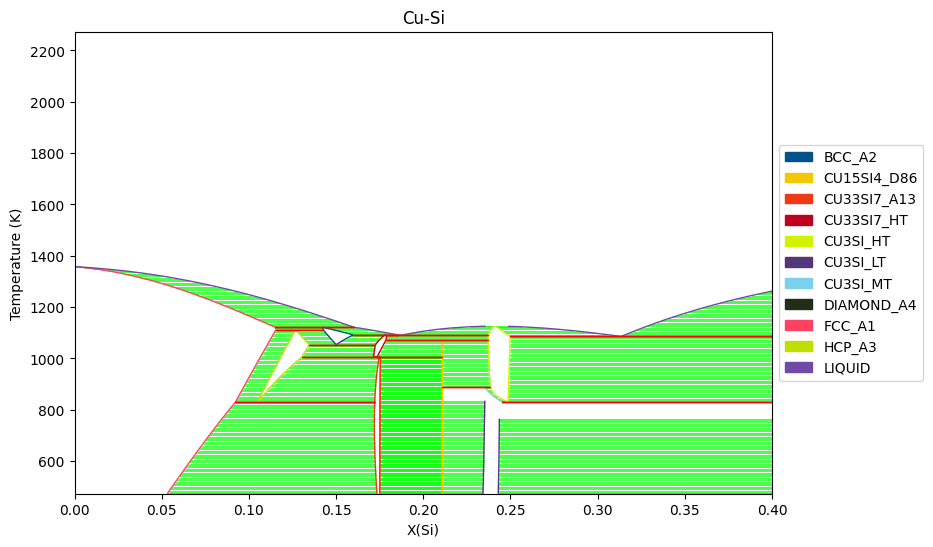

In [103]:
# Create a matplotlib Figure object and get the active Axes
fig = plt.figure(figsize=(9,6))
axes = fig.gca()

# binplot(dbf, ['CU', 'CR', 'VA'] , phases, conditions, plot_kwargs={'ax': axes})
binplot(dbf, ['CU', 'SI', 'VA'] , phases, conditions, plot_kwargs={'ax': axes})

# Set axis limits AFTER plotting
axes.set_xlim(0, 0.4)  # Composition range in mol f

axes.set_ylim(473.15, 2273.15)  # Temperature range in Kelvin

# Update axis labels
axes.set_ylabel('Temperature (K)')
# axes.set_xlabel('Mole Fraction of Ti')

plt.show()

In [24]:
system_name = "Cr-Ni"  # adjust to your system

# --- Conversion functions ---
M_CU = 63.546
M_NI = 58.6934
M_ZR = 91.22
M_CR = 51.9961


# Temperature range in Celcius
T_min_C, T_max_C = 200, 2000

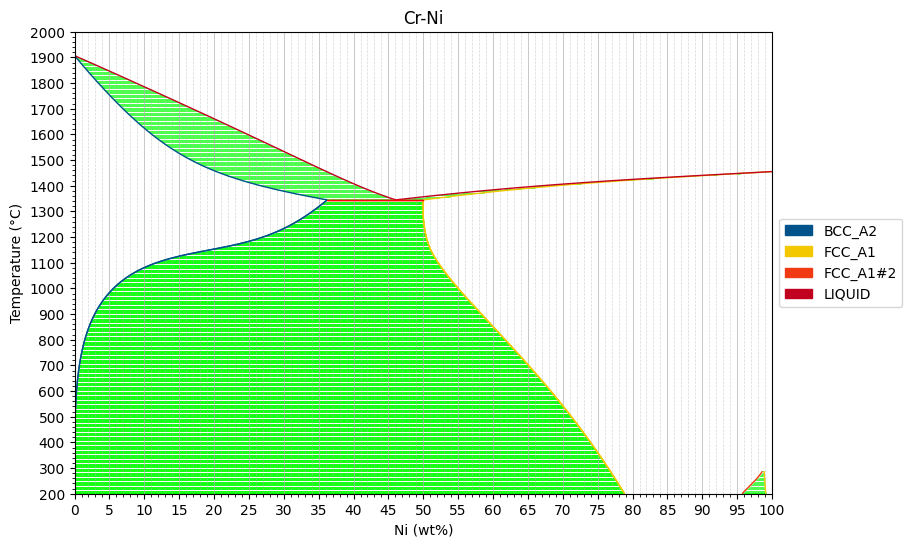

In [25]:
def x_to_wt_Ni(x):
    return 100.0 * (x * M_NI) / (x * M_NI + (1.0 - x) * M_CR)

def wt_to_x_Ni(wt_percent):
    """wt% Ni -> mole fraction Ni"""
    w = np.asarray(wt_percent) / 100.0
    num = w / M_NI                         # Here it goes the solute (Xaxis), the one that is two times in the function above
    den = num + (1.0 - w) / M_NI           #here it goes the solvent (this is the last item from the function above0
    return np.divide(num, den, out=np.zeros_like(num), where=den!=0)


def K_to_C(T):
    return T - 273.15

# --- Plot ---
fig = plt.figure(figsize=(9,6))
axes = fig.gca()

binplot(dbf, ['CR', 'NI', 'VA'], phases, conditions, plot_kwargs={'ax': axes})

# --- Update axes to show wt% Ni and °C ---
# Desired wt% ticks for Ni
wt_ticks = np.arange(0, 101, 5)  # 0,5,10,15,...,100 wt%
# Convert wt% to mole fraction for plotting
x_positions = wt_to_x_Ni(wt_ticks)

# axes.set_xticks(x_positions)
# axes.set_xticklabels([f"{int(w)}" for w in wt_ticks])
# axes.set_xlabel("Zr (wt%)")


# Desired °C ticks
major_C = np.arange(T_min_C, T_max_C + 1, 100)  # 200,300,...,2000
minor_C = np.arange(T_min_C, T_max_C + 1, 20)   # 200,250,...,2000

# Convert to K for internal plotting
major_K = major_C + 273.15
minor_K = minor_C + 273.15

axes.set_ylim(T_min_C + 273.15, T_max_C + 273.15)
axes.yaxis.set_major_locator(MultipleLocator(1))   # dummy, will override ticks manually
axes.yaxis.set_minor_locator(MultipleLocator(1))

# Set ticks manually in K, but labels in °C
axes.set_yticks(major_K)
axes.set_yticks(minor_K, minor=True)
axes.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{int(y - 273.15)}"))
axes.set_ylabel("Temperature (°C)")

# --- X axis: wt% Ni ---
wt_major = np.arange(0, 101, 5)  # major ticks every 5 wt%
wt_minor = np.arange(0, 101, 1)  # minor ticks every 1 wt%

# Convert to mole fraction for plotting
x_major = wt_to_x_Ni(wt_major)
x_minor = wt_to_x_Ni(wt_minor)

axes.set_xticks(x_major)
axes.set_xticks(x_minor, minor=True)
axes.set_xticklabels([f"{int(w)}" for w in wt_major])
axes.set_xlabel("Ni (wt%)")

# Optional: grid for X axis
axes.grid(which='major', axis='x', linestyle='-', linewidth=0.7, alpha=0.7)
axes.grid(which='minor', axis='x', linestyle='--', linewidth=0.5, alpha=0.5)

# --- Save figure ---
plt.savefig(f"{system_name}_binary_plot.png", dpi=300, bbox_inches='tight')

plt.show()